In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import os
import json
from pathlib import Path

# Function to load and merge all splits
def load_merged_data(base_dir):
    """Load and merge all splits (train, test, validate) from the degenerate directory"""
    all_data = []
    
    # Find all JSON files in the degenerate directory
    json_files = [f for f in os.listdir(base_dir) if f.endswith('.json')]
    
    print(f"Found {len(json_files)} files: {json_files}")
    
    # Load each file and merge
    for filename in json_files:
        filepath = os.path.join(base_dir, filename)
        
        # Extract split name for tracking (optional)
        split_name = filename.replace('degenerate_', '').replace('.json', '')
        
        with open(filepath, 'r') as f:
            data = json.load(f)
            
        # Add split information if you want to track which split each sample came from
        for sample in data:
            sample['split'] = split_name
            
        all_data.extend(data)
        print(f"Loaded {len(data)} samples from {filename}")
    
    print(f"Total merged samples: {len(all_data)}")
    return all_data


In [2]:
def map_model_names(df):
    """
    Map full HuggingFace model names to their shorter names based on the provided mapping.
    
    Args:
        df (DataFrame): DataFrame containing a 'model' column with HuggingFace model names
        
    Returns:
        DataFrame: DataFrame with updated model names
    """
    # Define the mapping from HuggingFace model names to short names
    model_mapping = {
        "meta-llama--Llama-3.2-1B-Instruct": "llama-1B",
        "meta-llama--Llama-3.2-3B-Instruct": "llama-3B",
        "meta-llama--Llama-3.1-8B-Instruct": "llama-8B",
        "meta-llama--Llama-3.3-70B-Instruct": "llama-70B",
        "mistralai--Mistral-7B-Instruct-v0.3": "mist-7B",
        "mistralai--Ministral-8B-Instruct-2410": "minist-8B",
        "mistralai--Mixtral-8x7B-Instruct-v0.1": "mixt-8x7B",
        "Qwen--Qwen2.5-7B-Instruct-1M": "qwen-7B",
        "Qwen--Qwen2.5-14B-Instruct": "qwen-14B",
        "Qwen--Qwen2.5-32B-Instruct": "qwen-32B",
        "microsoft--Phi-4-mini-instruct": "phi4",
        "google--gemma-3-4b-it": "gemma-4B",
        "google--gemma-3-12b-it": "gemma-12B"
    }
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_mapped = df.copy()
    
    # Replace model names using the mapping
    # df_mapped['original_model'] = df_mapped['model']  # Preserve original names if needed
    df_mapped['model'] = df_mapped['model'].replace(model_mapping)
    
    # # Check if any models weren't mapped and log them
    # unmapped_models = [model for model in df_mapped['model'].unique() 
    #                   if model not in model_mapping.values() and model in df_mapped['original_model'].unique()]
    
    # if unmapped_models:
    #     print(f"Warning: The following models weren't mapped: {unmapped_models}")
    
    return df_mapped

In [3]:
# ##### LOAD DEGENERATE DATA
# Load and merge all splits
degenerate_data = load_merged_data('../castillo/degenerate')
df = pd.DataFrame(degenerate_data)
df = map_model_names(df)

Found 3 files: ['degenerate_train.json', 'degenerate_test.json', 'degenerate_validate.json']
Loaded 956 samples from degenerate_train.json
Loaded 129 samples from degenerate_test.json
Loaded 302 samples from degenerate_validate.json
Total merged samples: 1387


In [4]:
# #### LOAD RAW DATA
# Load sample of raw data
raw_data = load_merged_data('../castillo/original')
raw_df = pd.DataFrame(raw_data)

raw_df = map_model_names(raw_df)

Found 3 files: ['original_test.json', 'original_validate.json', 'original_train.json']
Loaded 14121 samples from original_test.json
Loaded 27927 samples from original_validate.json
Loaded 97827 samples from original_train.json
Total merged samples: 139875


In [9]:
# #### DESTINATION DIR
DST_SAVE_PATH = "../outputs/images/degenerate/"

In [10]:
df.head()

,sample_id,prompt_id,model,dataset,prompt_text,longest_response,shortest_response,input_size,output_sizes,output_mean,output_std,output_percentiles,top_k,top_p,temp,category,gen_time,split
0,22ab549c309dc8c5,b239911480a3077b,qwen-14B,DollyDataset,Who are some of the most famous weird fiction ...,"In the early 20th century, several authors wer...",Weird fiction during the early 20th century wa...,84,"[15001, 438, 390, 359, 422, 478, 369, 458, 376...",1867.7,4377.93,"{'p25': 378.5, 'p50': 406.0, 'p75': 453.0, 'p9...",20,0.8,0.7,brainstorming,2985.54964,train
1,ee16485ed8077a7a,7b33a50f0f1f4b14,llama-70B,DS1000,Problem:\nWhat's the more pythonic way to pad ...,To pad an array with zeros at the end in a mor...,You can use the `numpy.pad` function to pad an...,223,"[15001, 449, 404, 601, 371, 323, 439, 393, 452...",1902.4,4367.01,"{'p25': 395.75, 'p50': 444.0, 'p75': 556.25, '...",50,0.9,0.6,undefined,7931.46896,train
2,f956596d71f25b3f,6427415457f8fc60,llama-70B,DS1000,Problem:\nI have a DataFrame like :\n 0 ...,"To achieve the desired result efficiently, you...",To efficiently move NaN values to the left in ...,358,"[492, 405, 406, 717, 618, 403, 965, 15001, 622...",2054.1,4319.91,"{'p25': 427.5, 'p50': 620.0, 'p75': 863.25, 'p...",50,0.9,0.6,undefined,8053.66946,train
3,4c974936e4697211,48cf0a660f2ec1d6,llama-70B,DS1000,Problem:\n\nWhen trying to fit a Random Forest...,"To solve the problem, we need to ensure that t...","To solve this problem, we need to ensure that ...",742,"[1153, 613, 1158, 751, 1062, 15001, 1106, 970,...",2505.0,4176.42,"{'p25': 993.0, 'p50': 1129.5, 'p75': 1459.5, '...",50,0.9,0.6,undefined,8356.40389,train
4,6e1faa37b2211532,0525478fb0283120,mist-7B,Apps,QUESTION: A chess position can be expressed as...,I will provide a Python solution for parsing F...,Here is a Python solution for parsing a FEN st...,2502,"[993, 15001, 1319, 2746, 1082, 1007, 2146, 343...",3169.5,4048.84,"{'p25': 1025.75, 'p50': 1732.5, 'p75': 3031.75...",50,1.0,1.0,undefined,2230.37047,train


In [11]:
def plot_degeneration_heatmap(df, figsize=(14, 10), fontsize=10, rotation=45, 
                             cmap='YlOrBr', annot=True, fmt='d', title=None,
                             save_path=None, dpi=300):
    """
    Create a heatmap showing degeneration counts by model and dataset
    
    Args:
        df (DataFrame): DataFrame containing the degeneration data
        figsize (tuple): Figure size (width, height) in inches
        fontsize (int): Font size for axis labels and ticks
        rotation (int): Rotation angle for x-axis tick labels
        cmap (str): Colormap for the heatmap
        annot (bool): Whether to annotate cells with values
        fmt (str): Format string for annotations
        title (str): Plot title (default: auto-generated)
        save_path (str): Path to save the figure (if None, figure is not saved)
        dpi (int): DPI for the saved figure
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    # Count occurrences of each model-dataset pair
    model_dataset_counts = df.groupby(['model', 'dataset']).size().reset_index(name='count')
    
    # Pivot the DataFrame for heatmap
    pivot_df = model_dataset_counts.pivot(index='model', columns='dataset', values='count')
    rename_dict = {
        "BigCodeBench": "BigCode",
        "DollyDataset": "Dolly",
    }
    pivot_df.rename(columns=rename_dict, inplace=True)
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(pivot_df, annot=annot, cmap=cmap, fmt="g", ax=ax, linewidths=0.5, linecolor='gray', 
                annot_kws={"size": fontsize+2}, 
                cbar_kws={'pad': 0.01} # 'shrink': 0.8,)
               )
    
    # Set title
    if title is None:
        title = 'Number of Degenerate Samples by Model and Dataset'
        
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    
    # ax.set_xlabel("Dataset", fontsize=xtick_fontsize+tmp_font_step)
    ax.set_xlabel(None)
    # ax.set_ylabel("Model", fontsize=xtick_fontsize+tmp_font_step)
    ax.set_ylabel(None)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig

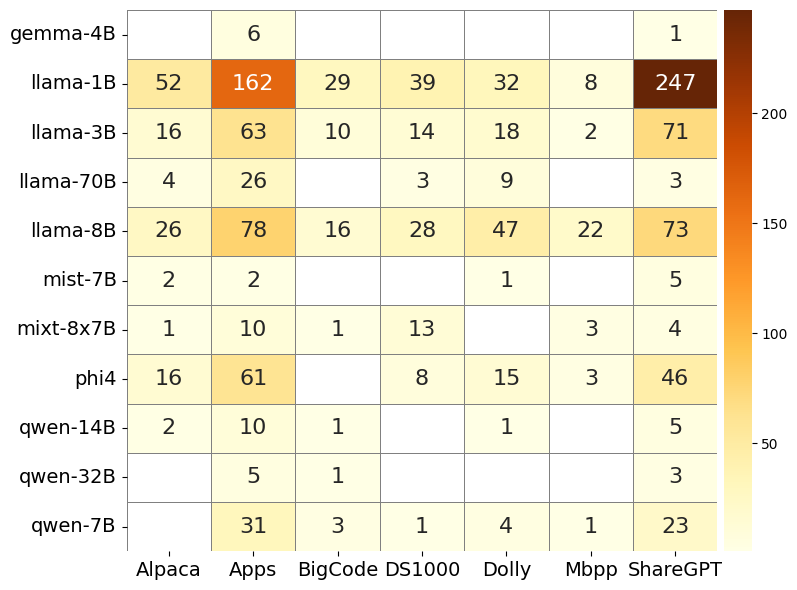

In [12]:
# Create visualizations with customized parameters
fig1 = plot_degeneration_heatmap(df, figsize=(8.5, 6), fontsize=14,rotation=0)

In [13]:
fig1.savefig(f"{DST_SAVE_PATH}/degenerate_heatmap_n_samples.pdf", dpi=300, bbox_inches='tight')

In [14]:
# def plot_degeneration_types(df, figsize=(15, 10), fontsize=10, rotation=45, 
#                            grid=True, grid_alpha=0.3, title=None,
#                            save_path=None, dpi=300, palette='viridis'):
#     """
#     Create a bar chart showing types of degeneration by model
    
#     Args:
#         df (DataFrame): DataFrame containing the degeneration data
#         figsize (tuple): Figure size (width, height) in inches
#         fontsize (int): Font size for axis labels and ticks
#         rotation (int): Rotation angle for x-axis tick labels
#         grid (bool): Whether to show grid lines
#         grid_alpha (float): Alpha transparency for grid lines
#         title (str): Plot title (default: auto-generated)
#         save_path (str): Path to save the figure (if None, figure is not saved)
#         dpi (int): DPI for the saved figure
#         palette (str): Color palette for the bars
        
#     Returns:
#         matplotlib.figure.Figure: The created figure
#     """
#     # Determine degeneration type for each sample if not already present
#     if 'degeneration_type' not in df.columns:
#         df['degeneration_type'] = df.apply(
#             lambda x: 'Max Length' if max(x['output_sizes']) >= 14999 else 'High Variance', 
#             axis=1
#         )
    
#     # Count by model and degeneration type
#     degen_type_counts = df.groupby(['model', 'degeneration_type']).size().reset_index(name='count')
    
#     # Create figure
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Create bar plot
#     sns.barplot(x='model', y='count', hue='degeneration_type', data=degen_type_counts, 
#                 palette=palette, ax=ax)
    
#     # Set title
#     if title is None:
#         title = 'Types of Degeneration by Model'
#     ax.set_title(title, fontsize=fontsize+2)
    
#     # Set labels
#     ax.set_xlabel('Model', fontsize=fontsize)
#     ax.set_ylabel('Count', fontsize=fontsize)
    
#     # Set tick parameters
#     plt.xticks(fontsize=fontsize, rotation=rotation)
#     plt.yticks(fontsize=fontsize)
    
#     # Set legend
#     plt.legend(title='Degeneration Type', fontsize=fontsize-2, title_fontsize=fontsize-1)
    
#     # Add grid if requested
#     if grid:
#         ax.grid(axis='y', alpha=grid_alpha, linestyle='--')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Save if path is provided
#     if save_path:
#         plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
#     return fig

# fig2 = plot_degeneration_types(
#         df, figsize=(8, 3), fontsize=12, rotation=20, grid=True,
#         #save_path='degeneration_types_all_splits.png'
#     )

In [15]:
# def plot_output_size_distribution(df, figsize=(15, 10), fontsize=10, rotation=45,
#                                  grid=True, grid_alpha=0.3, title=None,
#                                  show_thresholds=True, violin_cut=0,
#                                  save_path=None, dpi=300, palette='viridis'):
#     """
#     Create a violin plot showing distribution of output sizes by model
    
#     Args:
#         df (DataFrame): DataFrame containing the degeneration data
#         figsize (tuple): Figure size (width, height) in inches
#         fontsize (int): Font size for axis labels and ticks
#         rotation (int): Rotation angle for x-axis tick labels
#         grid (bool): Whether to show grid lines
#         grid_alpha (float): Alpha transparency for grid lines
#         title (str): Plot title (default: auto-generated)
#         show_thresholds (bool): Whether to show threshold lines
#         violin_cut (float): Where to cut the violin plot (0 means no cut)
#         save_path (str): Path to save the figure (if None, figure is not saved)
#         dpi (int): DPI for the saved figure
#         palette (str): Color palette for the violins
        
#     Returns:
#         matplotlib.figure.Figure: The created figure
#     """
#     # Explode the output_sizes list into separate rows
#     output_sizes_data = []
#     for _, row in df.iterrows():
#         model = row['model']
#         for size in row['output_sizes']:
#             output_sizes_data.append({
#                 'model': model,
#                 'output_size': size
#             })

#     df_sizes = pd.DataFrame(output_sizes_data)
    
#     # Create figure
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Create violin plot
#     sns.violinplot(x='model', y='output_size', data=df_sizes, cut=violin_cut, 
#                   palette=palette, ax=ax)
    
#     # Set title
#     if title is None:
#         title = 'Distribution of Output Sizes in Degenerate Samples'
#     ax.set_title(title, fontsize=fontsize+2)
    
#     # Set labels
#     ax.set_xlabel('Model', fontsize=fontsize)
#     ax.set_ylabel('Output Size (tokens)', fontsize=fontsize)
    
#     # Set tick parameters
#     plt.xticks(fontsize=fontsize, rotation=rotation)
#     plt.yticks(fontsize=fontsize)
    
#     # Add threshold lines if requested
#     if show_thresholds:
#         ax.axhline(y=14999, color='red', linestyle='--', alpha=0.7, label='Max Length Threshold')
#         ax.axhline(y=8499, color='orange', linestyle='--', alpha=0.7, label='High Variance Threshold')
#         plt.legend(fontsize=fontsize-2)
    
#     # Add grid if requested
#     if grid:
#         ax.grid(axis='y', alpha=grid_alpha, linestyle='--')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Save if path is provided
#     if save_path:
#         plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
#     return fig

# fig3 = plot_output_size_distribution(
#         df, figsize=(8, 3), fontsize=12, rotation=60,
#         # save_path='output_size_distribution_all_splits.png'
#     )

In [16]:
# def plot_sunburst_chart(df, path_columns=['model', 'dataset', 'degeneration_type'],
#                        values_column=None, width=900, height=900, 
#                        title=None, save_path=None, show_figure=True):
#     """
#     Create a sunburst chart for hierarchical view of degeneration
    
#     Args:
#         df (DataFrame): DataFrame containing the degeneration data
#         path_columns (list): List of columns defining the hierarchy path
#         values_column (str): Name of column containing values for sizing (if None, counts occurrences)
#         width (int): Width of the figure in pixels
#         height (int): Height of the figure in pixels
#         title (str): Plot title (default: auto-generated)
#         save_path (str): Path to save the figure as HTML (if None, figure is not saved)
#         show_figure (bool): Whether to show the figure (for Jupyter notebooks)
        
#     Returns:
#         plotly.graph_objs._figure.Figure: The created figure
#     """
#     import plotly.express as px
    
#     # First, ensure all path columns exist in the DataFrame
#     for col in path_columns:
#         if col not in df.columns:
#             # Special case for degeneration_type
#             if col == 'degeneration_type':
#                 df[col] = df.apply(
#                     lambda x: 'Max Length' if max(x['output_sizes']) >= 14999 else 'High Variance', 
#                     axis=1
#                 )
#             else:
#                 raise ValueError(f"Column '{col}' not found in DataFrame and cannot be automatically generated")
    
#     # Create a copy to avoid modifying the original
#     plot_df = df.copy()
    
#     # If values_column is not provided, we'll count occurrences
#     if values_column is None:
#         # Group by the path columns and count
#         if len(path_columns) > 1:
#             # First ensure all path columns are treated as categories
#             for col in path_columns:
#                 if plot_df[col].dtype == 'object':
#                     plot_df[col] = plot_df[col].astype('category')
            
#             # Group and count
#             plot_df = plot_df.groupby(path_columns).size().reset_index(name='count')
#             values_column = 'count'
#         else:
#             # Handle single path column case
#             plot_df['count'] = 1
#             values_column = 'count'
    
#     # Set title
#     if title is None:
#         title = 'Hierarchy of Degeneration: ' + ' → '.join(path_columns)
    
#     # Print debug info
#     print(f"Sunburst data shape: {plot_df.shape}")
#     print(f"Path columns: {path_columns}")
#     print(f"Values column: {values_column}")
#     print(f"Sample of data:")
#     print(plot_df.head())
    
#     # Create sunburst chart with explicit configuration
#     try:
#         fig = px.sunburst(
#             plot_df,
#             path=path_columns,
#             values=values_column,
#             title=title,
#             width=width,
#             height=height
#         )
        
#         # Update layout with explicit configuration
#         fig.update_layout(
#             title_font_size=20,
#             margin=dict(t=50, l=0, r=0, b=0)
#         )
        
#         # Save if path is provided
#         if save_path:
#             fig.write_html(save_path)
#             print(f"Sunburst chart saved to {save_path}")
        
#         # Show the figure if requested (mainly for Jupyter)
#         if show_figure:
#             fig.show()
        
#         return fig
        
#     except Exception as e:
#         print(f"Error creating sunburst chart: {str(e)}")
#         import traceback
#         traceback.print_exc()
#         return None

# # Create the sunburst chart with debug information
# fig = plot_sunburst_chart(
#     df,
#     path_columns=['model', 'dataset', 'degeneration_type'],
#     width=500, 
#     height=500,
#     title="Degeneration Analysis by Model, Dataset, and Type",
#     # save_path='degeneration_sunburst_all_splits.html',
#     show_figure=True  # Set to True if in Jupyter notebook
# )

In [17]:
# def plot_parameter_correlation(df, figsize=(12, 10), fontsize=10,
#                               cmap='coolwarm', vmin=-1, vmax=1,
#                               title=None, save_path=None, dpi=300):
#     """
#     Create a heatmap showing correlation between sampling parameters and degeneration severity
    
#     Args:
#         df (DataFrame): DataFrame containing the degeneration data
#         figsize (tuple): Figure size (width, height) in inches
#         fontsize (int): Font size for axis labels and ticks
#         cmap (str): Colormap for the heatmap
#         vmin (float): Minimum value for colormap
#         vmax (float): Maximum value for colormap
#         title (str): Plot title (default: auto-generated)
#         save_path (str): Path to save the figure (if None, figure is not saved)
#         dpi (int): DPI for the saved figure
        
#     Returns:
#         matplotlib.figure.Figure: The created figure
#     """
#     # Extract and normalize parameters
#     if not all(col in df.columns for col in ['temp', 'top_k', 'top_p', 'severity']):
#         param_data = []
#         for _, row in df.iterrows():
#             model = row['model']
#             max_size = max(row['output_sizes'])
#             std = row['output_std']
#             mean = row['output_mean']
            
#             # Calculate degeneration severity
#             if max_size >= 14999:
#                 severity = 1.0  # Max severity for max length
#             else:
#                 # Normalize by how much std exceeds 2*mean
#                 severity = min(1.0, (std / (2 * mean)) - 1)
            
#             param_data.append({
#                 'model': model,
#                 'temp': row['temp'],
#                 'top_k': row['top_k'],
#                 'top_p': row['top_p'],
#                 'severity': severity
#             })
        
#         df_params = pd.DataFrame(param_data)
#     else:
#         df_params = df.copy()
    
#     # Create figure
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Create correlation heatmap
#     param_corr = df_params[['temp', 'top_k', 'top_p', 'severity']].corr()
#     sns.heatmap(param_corr, annot=True, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax,
#                annot_kws={"size": fontsize})
    
#     # Set title
#     if title is None:
#         title = 'Correlation Between Sampling Parameters and Degeneration Severity'
#     ax.set_title(title, fontsize=fontsize+2)
    
#     # Set tick parameters
#     plt.xticks(fontsize=fontsize)
#     plt.yticks(fontsize=fontsize)
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Save if path is provided
#     if save_path:
#         plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
#     return fig

# fig5 = plot_parameter_correlation(
#         df,
#         figsize=(4, 3), 
#         fontsize=12,
#         # save_path='parameter_correlation_all_splits.png'
#     )

In [18]:
# def plot_std_boxplot(df, figsize=(15, 10), fontsize=10, rotation=45,
#                     grid=True, grid_alpha=0.3, title=None,
#                     save_path=None, dpi=300, palette='viridis', flyers=False):
#     """
#     Create a boxplot showing distribution of standard deviation by model
    
#     Args:
#         df (DataFrame): DataFrame containing the degeneration data
#         figsize (tuple): Figure size (width, height) in inches
#         fontsize (int): Font size for axis labels and ticks
#         rotation (int): Rotation angle for x-axis tick labels
#         grid (bool): Whether to show grid lines
#         grid_alpha (float): Alpha transparency for grid lines
#         title (str): Plot title (default: auto-generated)
#         save_path (str): Path to save the figure (if None, figure is not saved)
#         dpi (int): DPI for the saved figure
#         palette (str): Color palette for the boxes
        
#     Returns:
#         matplotlib.figure.Figure: The created figure
#     """
#     # Create figure
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Create boxplot
#     sns.boxplot(x='model', y='output_std', data=df, palette=palette, ax=ax, showfliers=flyers,
#                whis=(10,90))
    
#     # Set title
#     if title is None:
#         title = 'Distribution of Standard Deviation in Output Sizes by Model'
#     ax.set_title(title, fontsize=fontsize+2)
    
#     # Set labels
#     ax.set_xlabel('Model', fontsize=fontsize)
#     ax.set_ylabel('Standard Deviation', fontsize=fontsize)
    
#     # Set tick parameters
#     plt.xticks(fontsize=fontsize, rotation=rotation)
#     plt.yticks(fontsize=fontsize)
    
#     # Add grid if requested
#     if grid:
#         ax.grid(axis='y', alpha=grid_alpha, linestyle='--')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Save if path is provided
#     if save_path:
#         plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
#     return fig

# fig6 = plot_std_boxplot(
#         df, figsize=(8, 5), fontsize=12, rotation=60,
#         #save_path='std_distribution_all_splits.png'
#     )

In [19]:

def plot_model_percentages(df, figsize=(15, 10), fontsize=10, rotation=45,
                          grid=True, grid_alpha=0.3, title=None,
                          save_path=None, dpi=300, color='steelblue', show_annotations=True, annotation_fontsize=8):
    """
    Create a bar chart showing percentage of degenerate samples by model
    
    Args:
        df (DataFrame): DataFrame containing the degeneration data
        figsize (tuple): Figure size (width, height) in inches
        fontsize (int): Font size for axis labels and ticks
        rotation (int): Rotation angle for x-axis tick labels
        grid (bool): Whether to show grid lines
        grid_alpha (float): Alpha transparency for grid lines
        title (str): Plot title (default: auto-generated)
        save_path (str): Path to save the figure (if None, figure is not saved)
        dpi (int): DPI for the saved figure
        color (str): Color for the bars
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    # Count samples per model
    model_counts = df['model'].value_counts()
    total_counts = len(df)
    
    # Calculate percentages
    model_percentages = (model_counts / total_counts) * 100
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create bar plot
    model_percentages.plot(kind='bar', color=color, ax=ax)
    
    # Set title
    if title is not None:
        ax.set_title(title, fontsize=fontsize+2)
    
    # Set labels
    # ax.set_xlabel('Model', fontsize=fontsize+2)
    ax.set_xlabel(None)
    ax.set_ylabel('Share within Degenerate Set [%]', fontsize=fontsize)

    # Add percentage annotations on top of bars
    if show_annotations:
        for i, (dataset, percentage) in enumerate(model_percentages.items()):
            ax.text(
                i+0.1, 
                percentage,  # Slightly above the bar
                f'{percentage:.1f}%',
                ha='center',
                va='bottom',
                fontsize=annotation_fontsize,
                fontweight='bold'
            )
    
    
    # Set tick parameters
    plt.xticks(fontsize=fontsize, rotation=rotation)
    plt.yticks(fontsize=fontsize)
    
    # Add grid if requested
    if grid:
        ax.grid(axis='y', alpha=grid_alpha, linestyle='--')
        ax.grid(axis='x', alpha=grid_alpha, linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        
    return fig




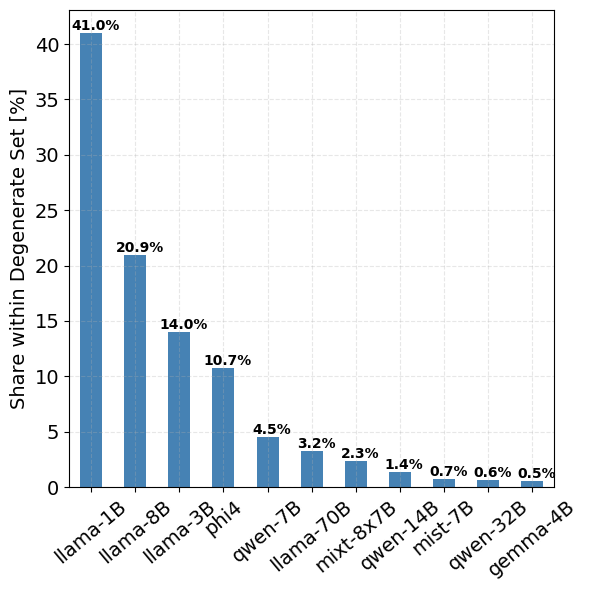

In [44]:
fig7 = plot_model_percentages(
        df,
        figsize=(6, 6), 
        fontsize=14, annotation_fontsize=10,
        rotation=40,
        # save_path='model_percentages_all_splits.png'
    )

In [45]:
fig7.savefig(f"{DST_SAVE_PATH}/degenerate_barplot_share-in-deg.pdf", dpi=300, bbox_inches='tight')

In [22]:
def plot_dataset_percentages(df, figsize=(15, 10), fontsize=10, rotation=45,
                           grid=True, grid_alpha=0.3, title=None,
                           save_path=None, dpi=300, color='steelblue',
                           show_annotations=True, annotation_fontsize=9):
    """
    Create a bar chart showing percentage of degenerate samples by dataset
    
    Args:
        df (DataFrame): DataFrame containing the degeneration data
        figsize (tuple): Figure size (width, height) in inches
        fontsize (int): Font size for axis labels and ticks
        rotation (int): Rotation angle for x-axis tick labels
        grid (bool): Whether to show grid lines
        grid_alpha (float): Alpha transparency for grid lines
        title (str): Plot title (default: auto-generated)
        save_path (str): Path to save the figure (if None, figure is not saved)
        dpi (int): DPI for the saved figure
        color (str): Color for the bars
        show_annotations (bool): Whether to show percentage values on top of bars
        annotation_fontsize (int): Font size for annotations
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    import matplotlib.pyplot as plt
    import numpy as np

    df_copy = df.copy()
    
    # Count samples per dataset
    dataset_counts = df_copy['dataset'].value_counts()
    dataset_counts = dataset_counts.rename(index={"DollyDataset": "Dolly", "BigCodeBench": "BigCode"})
    total_counts = len(df_copy)
    
    # Calculate percentages
    dataset_percentages = (dataset_counts / total_counts) * 100
    
    # Sort percentages in descending order for better visualization
    dataset_percentages = dataset_percentages.sort_values(ascending=False)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create bar plot
    bars = dataset_percentages.plot(kind='bar', color=color, ax=ax)
    
    # Add percentage annotations on top of bars
    if show_annotations:
        for i, (dataset, percentage) in enumerate(dataset_percentages.items()):
            ax.text(
                i+0.05, 
                percentage,  # Slightly above the bar
                f'{percentage:.1f}%',
                ha='center',
                va='bottom',
                fontsize=annotation_fontsize,
                fontweight='bold'
            )
    
    # Set labels
    # ax.set_xlabel('Dataset', fontsize=fontsize+2)
    ax.set_xlabel(None)
    ax.set_ylabel('Share within Degenerate Set [%]', fontsize=fontsize+2)
    
    # Set tick parameters
    plt.xticks(fontsize=fontsize, rotation=rotation)
    plt.yticks(fontsize=fontsize)
    
    # Add grid if requested
    if grid:
        ax.grid(axis='y', alpha=grid_alpha, linestyle='--')
        ax.grid(axis='x', alpha=grid_alpha, linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Dataset percentages chart saved to {save_path}")
    
    # Show the figure
    plt.show()
    
    return fig

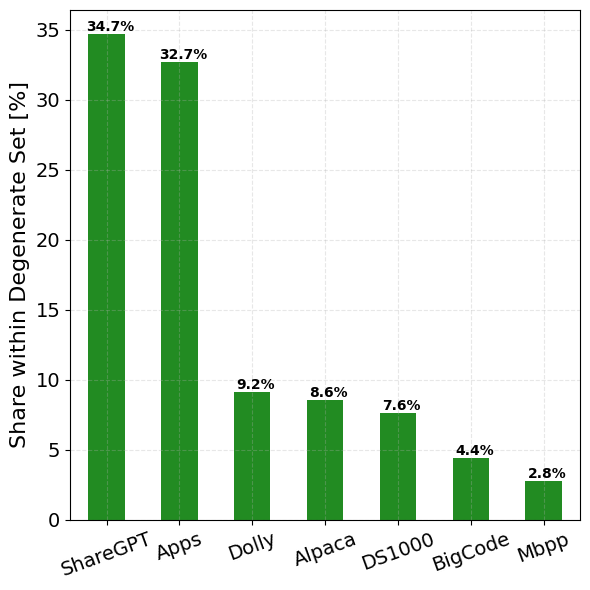

In [46]:
fig30 = plot_dataset_percentages(
    df,  # Your preprocessed DataFrame
    figsize=(6, 6),
    fontsize=14, annotation_fontsize=10,
    rotation=20,
    grid=True,
    grid_alpha=0.3,
    color='forestgreen',  # Different color from the model plot
    show_annotations=True,
    # save_path='dataset_percentages_all_splits.png'
)

In [47]:
fig30.savefig(f"{DST_SAVE_PATH}/degenerate_barplot_share_dataset.pdf", dpi=300, bbox_inches='tight')

In [41]:
def plot_degeneration_rate(df_degenerate, df_raw, figsize=(15, 10), fontsize=10, rotation=45,
                           cmap='YlOrRd', annot=True, fmt='g', title=None,
                           save_path=None, dpi=300):
    """
    Create a heatmap showing degeneration rate by model and dataset
    
    Args:
        df_degenerate (DataFrame): DataFrame containing the degenerate data
        df_raw (DataFrame): DataFrame containing the raw data
        figsize (tuple): Figure size (width, height) in inches
        fontsize (int): Font size for axis labels and ticks
        rotation (int): Rotation angle for x-axis tick labels
        cmap (str): Colormap for the heatmap
        annot (bool): Whether to annotate cells with values
        fmt (str): Format string for annotations
        title (str): Plot title (default: auto-generated)
        save_path (str): Path to save the figure (if None, figure is not saved)
        dpi (int): DPI for the saved figure
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    # Count model-dataset pairs in degenerate data
    degen_counts = df_degenerate.groupby(['model', 'dataset']).size().reset_index(name='count')
    
    # Count model-dataset pairs in raw data
    raw_counts = df_raw.groupby(['model', 'dataset']).size().reset_index(name='total_count')
    
    # Merge counts
    merged_counts = pd.merge(degen_counts, raw_counts, on=['model', 'dataset'], how='left')
    
    # Calculate degeneration rate
    merged_counts['degeneration_rate'] = merged_counts['count'] / merged_counts['total_count'] * 100
    
    # Pivot for heatmap
    pivot_rates = merged_counts.pivot(index='model', columns='dataset', values='degeneration_rate')

    rename_dict = {
        "BigCodeBench": "BigCode",
        "DollyDataset": "Dolly",
    }
    pivot_rates.rename(columns=rename_dict, inplace=True)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(pivot_rates, annot=annot, cmap=cmap, fmt=fmt, ax=ax, 
                linecolor='gray', annot_kws={"size": fontsize+2}, cbar_kws={'pad': 0.01})

    # Set title
    if title is None:
        title = 'Degeneration Rate (%) by Model and Dataset'
    ax.set_title(title, fontsize=fontsize+2)

    ax.set_ylabel("Model", fontsize=fontsize)
    ax.set_xlabel("Dataset", fontsize=fontsize)
    
    # Set tick parameters
    plt.xticks(fontsize=fontsize, rotation=rotation)
    plt.yticks(fontsize=fontsize)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig

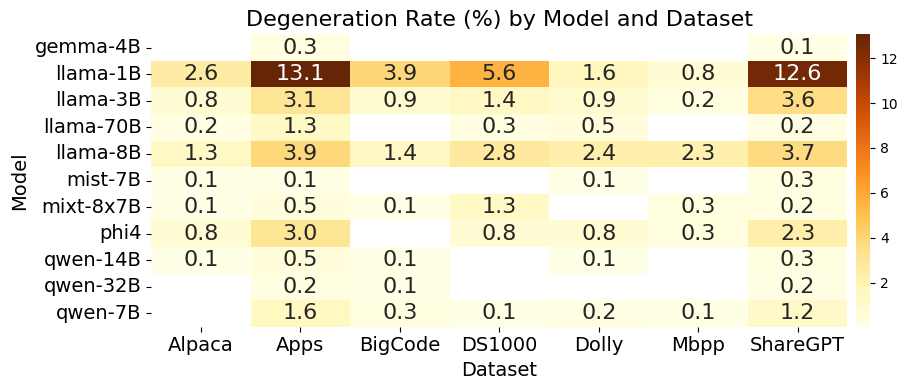

In [42]:
fig20 = plot_degeneration_rate(df, raw_df, figsize=(10, 4), fontsize=14, rotation=0,
                           cmap='YlOrBr', annot=True, fmt='.1f', title=None,
                               save_path=None, dpi=300)

In [43]:
fig20.savefig(f"{DST_SAVE_PATH}/degenerate_heatmap_share_perc.pdf", dpi=300, bbox_inches='tight')

In [29]:
def plot_model_dataset_scatter(df, figsize=(14, 10), fontsize=10,
                             grid=True, grid_alpha=0.3, title=None,
                             save_path=None, dpi=300, palette='viridis',
                             alpha=0.7, size_column='output_mean'):
    """
    Create a scatter plot showing relationship between models and datasets
    
    Args:
        df (DataFrame): DataFrame containing the degeneration data
        figsize (tuple): Figure size (width, height) in inches
        fontsize (int): Font size for axis labels and ticks
        grid (bool): Whether to show grid lines
        grid_alpha (float): Alpha transparency for grid lines
        title (str): Plot title (default: auto-generated)
        save_path (str): Path to save the figure (if None, figure is not saved)
        dpi (int): DPI for the saved figure
        palette (str): Color palette for the points
        alpha (float): Alpha transparency for points
        size_column (str): Column to use for point size
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Aggregate data by model and dataset
    grouped = df.groupby(['model', 'dataset']).agg({
        'output_mean': 'mean',
        'output_std': 'mean',
        'model': 'count'
    }).rename(columns={'model': 'count'}).reset_index()
    
    # Create scatter plot
    scatter = ax.scatter(
        x=grouped['model'].astype('category').cat.codes,  # Convert model to numeric codes
        y=grouped['dataset'].astype('category').cat.codes,  # Convert dataset to numeric codes
        s=grouped[size_column] / grouped[size_column].max() * 200,  # Normalize size
        c=grouped['output_std'],  # Color by std
        cmap=palette,
        alpha=alpha
    )
    
    # Set title
    if title is None:
        title = 'Model-Dataset Relationship in Degenerate Samples'
    ax.set_title(title, fontsize=fontsize+2)
    
    # Set labels and ticks
    ax.set_xlabel('Model', fontsize=fontsize)
    ax.set_ylabel('Dataset', fontsize=fontsize)
    
    # Set custom tick labels
    plt.xticks(
        range(len(grouped['model'].unique())),
        grouped['model'].unique(),
        fontsize=fontsize,
        rotation=45
    )
    
    plt.yticks(
        range(len(grouped['dataset'].unique())),
        grouped['dataset'].unique(),
        fontsize=fontsize
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Output Standard Deviation', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize-2)
    
    # Add grid if requested
    if grid:
        ax.grid(alpha=grid_alpha, linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig

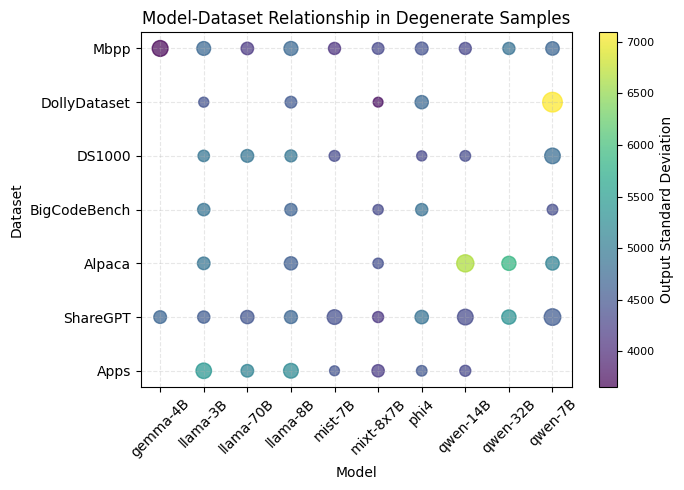

In [30]:
fig10 = plot_model_dataset_scatter(df, figsize=(7, 5), fontsize=10,
                             grid=True, grid_alpha=0.3, title=None,
                             save_path=None, dpi=300, palette='viridis',
                             alpha=0.7, size_column='output_mean')

In [60]:
fig30.savefig(f"{DST_SAVE_PATH}/degenerate_barplot_share_dataset.pdf", dpi=300, bbox_inches='tight')

In [54]:
def plot_treemap(df, path_columns=['model', 'dataset'], 
               values_column=None, figsize=(12, 10), dpi=300,
               title=None, colormap='viridis', 
               save_path=None, show_figure=True):
    """
    Create a treemap visualization from hierarchical data
    
    Args:
        df (DataFrame): DataFrame containing the data
        path_columns (list): List of columns defining the hierarchy path
        values_column (str): Name of column containing values for sizing (if None, counts occurrences)
        figsize (tuple): Figure size (width, height) in inches
        dpi (int): DPI for the saved figure
        title (str): Plot title (default: auto-generated)
        colormap (str): Colormap for the treemap
        save_path (str): Path to save the figure as PNG (if None, figure is not saved)
        show_figure (bool): Whether to show the figure (for Jupyter notebooks)
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import squarify
    import pandas as pd
    
    # Create a copy to avoid modifying the original
    plot_df = df.copy()
    
    # If values_column is not provided, we'll count occurrences
    if values_column is None:
        # Group by the path columns and count
        plot_df = plot_df.groupby(path_columns).size().reset_index(name='count')
        values_column = 'count'
    
    # Set title
    if title is None:
        title = 'Distribution by ' + ' and '.join(path_columns)
    
    # Create a normalized path column and aggregate values
    plot_df['path'] = plot_df.apply(lambda row: ' / '.join(str(row[col]) for col in path_columns), axis=1)
    aggregated = plot_df.groupby('path')[values_column].sum().reset_index()
    
    # Sort by value for better visualization
    aggregated = aggregated.sort_values(values_column, ascending=False)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Generate colors
    cmap = plt.cm.get_cmap(colormap)
    colors = [cmap(i/len(aggregated)) for i in range(len(aggregated))]
    
    # Extract the first level (model) for color grouping
    first_level_categories = plot_df[path_columns[0]].unique()
    color_dict = {cat: cmap(i/len(first_level_categories)) 
                 for i, cat in enumerate(first_level_categories)}
    
    # Assign colors based on first level
    path_colors = []
    for path in aggregated['path']:
        first_level = path.split(' / ')[0]
        path_colors.append(color_dict[first_level])
    
    # Create the treemap
    squarify.plot(
        sizes=aggregated[values_column],
        label=aggregated['path'], 
        alpha=0.8,
        color=path_colors,
        pad=True,
        ax=ax
    )
    
    # Create a legend for the first level categories
    legend_patches = [mpatches.Patch(color=color_dict[cat], label=cat) 
                     for cat in first_level_categories]
    ax.legend(handles=legend_patches, loc='lower center', 
              bbox_to_anchor=(0.5, -0.15), ncol=min(5, len(first_level_categories)))
    
    # Set title and layout
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()
    
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Treemap saved to {save_path}")
    
    # Show the figure if requested
    if show_figure:
        plt.show()
    
    return fig

/var/folders/21/dxyl783s53d8qrpjq_tj8nvw0000gn/T/ipykernel_23528/790990807.py:51: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



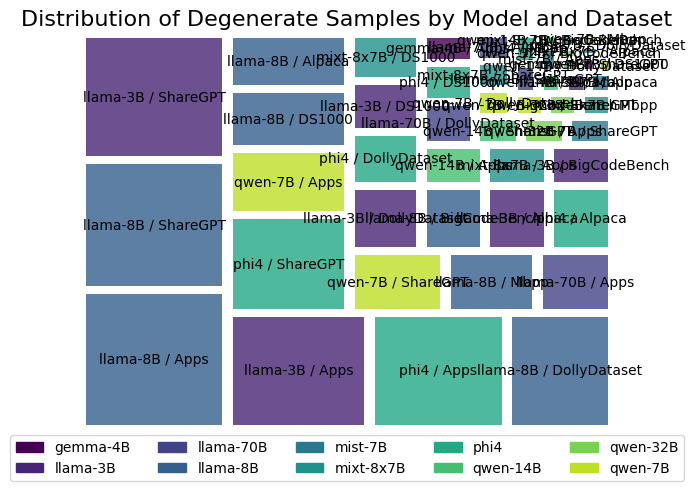

In [87]:
# Create a treemap visualization
fig = plot_treemap(
    df,
    path_columns=['model', 'dataset'],
    figsize=(7,5),
    dpi=300,
    title="Distribution of Degenerate Samples by Model and Dataset",
    colormap='viridis',
    # save_path='treemap_model_dataset.png'
)

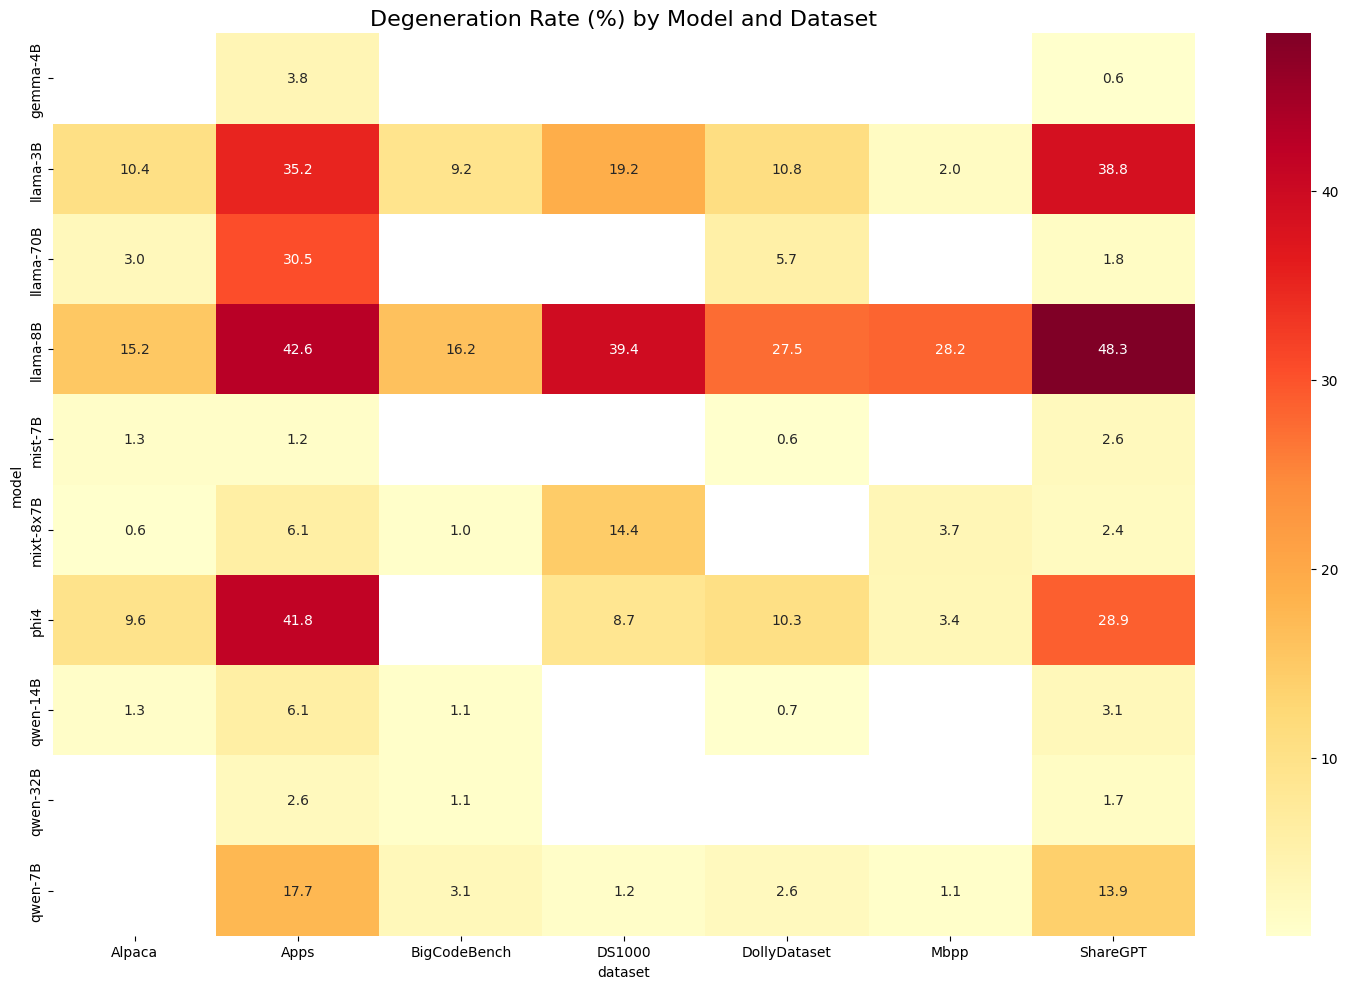

In [93]:
import random
# Load a sample of the raw data to compare degeneration rates
def load_sample_raw_data(raw_dir, max_samples=10000):
    """Load a sample of raw data to calculate degeneration rates"""
    all_samples = []
    json_files = [f for f in os.listdir(raw_dir) if f.endswith('.json')]
    
    for filename in json_files:
        filepath = os.path.join(raw_dir, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        # Take a sample if the file is too large
        if len(data) > max_samples // len(json_files):
            data = random.sample(data, max_samples // len(json_files))
            
        all_samples.extend(data)
    
    return all_samples


# Count model-dataset pairs in raw data
raw_counts = raw_df.groupby(['model', 'dataset']).size().reset_index(name='total_count')


# 1. Heatmap of Degeneration Frequency
# Count occurrences of each model-dataset pair
model_dataset_counts = df.groupby(['model', 'dataset']).size().reset_index(name='count')

# Merge with degenerate counts
merged_counts = pd.merge(
    model_dataset_counts, 
    raw_counts, 
    on=['model', 'dataset'], 
    how='left'
)

# Calculate degeneration rate
merged_counts['degeneration_rate'] = merged_counts['count'] / merged_counts['total_count'] * 100

# Create heatmap of degeneration rates
pivot_rates = merged_counts.pivot(index='model', columns='dataset', values='degeneration_rate')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_rates, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Degeneration Rate (%) by Model and Dataset', fontsize=16)
plt.tight_layout()